In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import random

In [6]:
with np.load('mnist.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
#Define the network architecture using keras

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

C:\Users\hoodk\anaconda3\envs\practical\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Train the model using SGD

In [13]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8386 - loss: 0.6415 - val_accuracy: 0.9066 - val_loss: 0.3504
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9071 - loss: 0.3323 - val_accuracy: 0.9195 - val_loss: 0.2895
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9198 - loss: 0.2846 - val_accuracy: 0.9285 - val_loss: 0.2578
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9283 - loss: 0.2552 - val_accuracy: 0.9328 - val_loss: 0.2374
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9348 - loss: 0.2335 - val_accuracy: 0.9379 - val_loss: 0.2184
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9399 - loss: 0.2152 - val_accuracy: 0.9427 - val_loss: 0.2030
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9440 - loss: 0.1998 - val_accuracy: 0.9448 - val_loss: 0.1915
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9476 - loss: 0.1866 

In [15]:
#Evaluate the Network

In [16]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9531 - loss: 0.1622
Loss=0.162
Accuracy=0.953


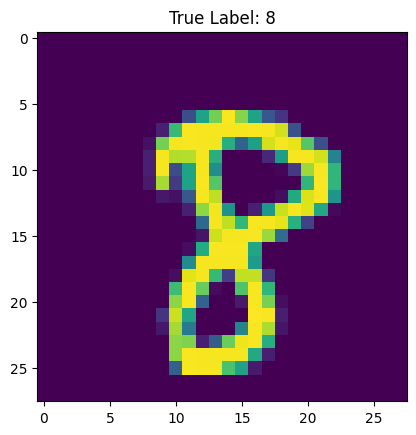

In [18]:
#Show test image
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.title(f"True Label: {y_test[n]}")
plt.show()

In [19]:
#Predict the digit
pred = model.predict(x_test[n].reshape(1,28,28))
predicted_label = np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


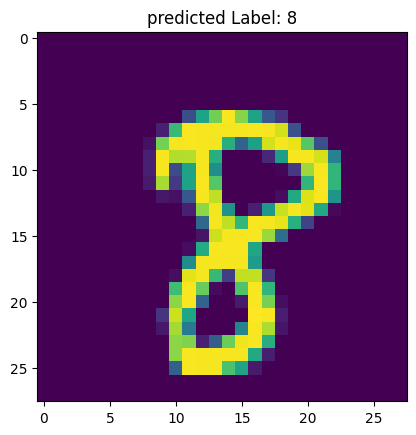

In [20]:
#Show the same image with predicted label
plt.imshow(x_test[n])
plt.title(f"predicted Label: {predicted_label}")
plt.show()

In [21]:
print("Predicted Label:",predicted_label)
print("True Label:", y_test[n])

Predicted Label: 8
True Label: 8


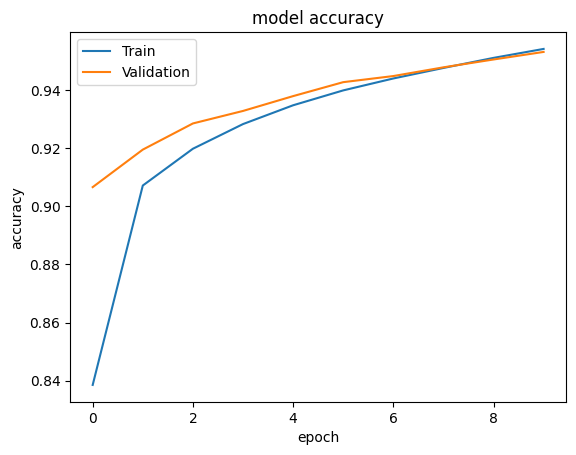

In [23]:
#Plot Training Loss & Accuracy
        #Traing Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

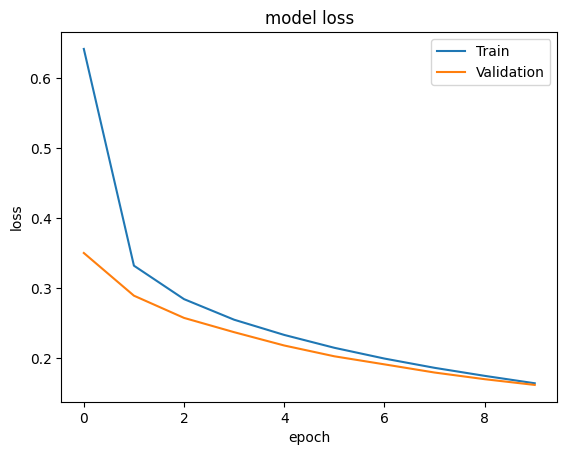

In [24]:
    #Training Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()